In [1]:
import h5py
import numpy as np
import keras
from tensorflow.python.keras.utils.np_utils import to_categorical
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense,GlobalMaxPooling2D,Input
import matplotlib.pyplot as plt


In [2]:
# 导入数据（https://nekokecore.lanzoub.com/iHg4L086j15a）
train_dataset = h5py.File('datasets/train_signs.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 
test_dataset = h5py.File('datasets/test_signs.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

classes = np.array(test_dataset["list_classes"][:]) 
# the list of classes
train_set_y_orig = train_set_y_orig.reshape((train_set_y_orig.shape[0],1))
test_set_y_orig = test_set_y_orig.reshape((test_set_y_orig.shape[0],1))

print("-----Reshaped data:")
X_train = train_set_x_orig/255
X_test = test_set_x_orig/255
Y_train = to_categorical(train_set_y_orig,6)
Y_test = to_categorical(test_set_y_orig,6)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

-----Reshaped data:
(1080, 64, 64, 3)
(1080, 6)
(120, 64, 64, 3)
(120, 6)


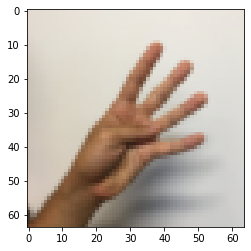

In [3]:
plt.imshow(train_set_x_orig[30])

In [4]:
base_model = VGG19(weights='imagenet',include_top=False)

x = base_model.output
x = GlobalMaxPooling2D()(x)
x = Dense(128,activation='relu')(x)
predictions = Dense(6,activation='softmax')(x)
model = Model(inputs=base_model.input,outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [5]:
model.fit(X_train,Y_train,epochs=20,batch_size=64)
score = model.evaluate(X_test,Y_test)
print("Total loss:",score[0])
print("Test accuracy:",score[1])

Epoch 1/20
17/17 [==============================] - 5s 65ms/step - loss: 1.4391 - accuracy: 0.4750
Epoch 2/20
17/17 [==============================] - 0s 24ms/step - loss: 0.8986 - accuracy: 0.7546
Epoch 3/20
17/17 [==============================] - 0s 25ms/step - loss: 0.6940 - accuracy: 0.7796
Epoch 4/20
17/17 [==============================] - 0s 24ms/step - loss: 0.5777 - accuracy: 0.8241
Epoch 5/20
17/17 [==============================] - 0s 24ms/step - loss: 0.4927 - accuracy: 0.8546
Epoch 6/20
17/17 [==============================] - 0s 24ms/step - loss: 0.4199 - accuracy: 0.9056
Epoch 7/20
17/17 [==============================] - 0s 24ms/step - loss: 0.3633 - accuracy: 0.9241
Epoch 8/20
17/17 [==============================] - 0s 23ms/step - loss: 0.3245 - accuracy: 0.9333
Epoch 9/20
17/17 [==============================] - 0s 24ms/step - loss: 0.2927 - accuracy: 0.9435
Epoch 10/20
17/17 [==============================] - 0s 24ms/step - loss: 0.2686 - accuracy: 0.9509
Epoch 11/

手势:


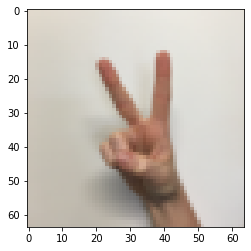

预测值： 2
手势:


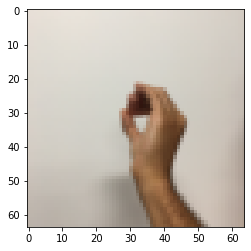

预测值： 0


In [6]:
# 0~119
def pre(index):
    print("手势:")
    plt.imshow(X_test[index])
    plt.show()
    print("预测值：",np.argmax(model.predict(X_test[index:index+1])))

pre(100)
pre(1)
